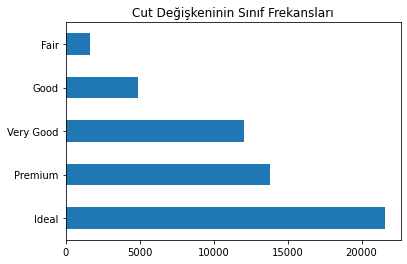

In [13]:
import seaborn as sns
diamond = sns.load_dataset("diamonds") #seaborn dan diamonds veri setini import ettim
diamond2 = diamond.copy()  #bir yedeğini aldım
#print(diamond.head(10)) #ilk 10 satırı incelemek için
#print(diamond.info()) #dataset hakkında bilgi
#print(diamond.value_counts().isnull().any()) #null değer var mı
#print(diamond.describe().T) #nümerik ve null olmayan değişkenlerle ilgili sayısal bilgiler
#print(diamond.select_dtypes(include=["category"])) #kategorik değişkenlerin seçilmesi
#print(diamond["cut"].value_counts()) #cut sütunundaki değer sayıları
#print(diamond["color"].value_counts()) #color sütununun frekansı

#ordinal tanımlama ---> Çünkü cut kategorisi nominal değil ordinaldir.En değerlinin hangisi olduğu bilgisayara tanıtılmalıdır.
from pandas.api.types import CategoricalDtype #Ordinal sıralama için bu kütüphaneyi import ettik

diamond.cut.head()
cut_kategoriler = ["Fair","Good","Very Good","Premium","Ideal"] #Sıralama değerlerini buna göre yapması için bunu oluşturdum
diamond.cut = diamond.cut.astype(CategoricalDtype (categories= cut_kategoriler , ordered= True)) #cut ı astype diyerek buna göre sırala diyoruz. Kategoriyi seçip sıralı diyoruz.
#print(diamond.cut)
(diamond.cut.value_counts().plot.barh().set_title("Cut Değişkeninin Sınıf Frekansları"));
#sns.barplot(x = "cut", y=diamond.cut.index, data=diamond)

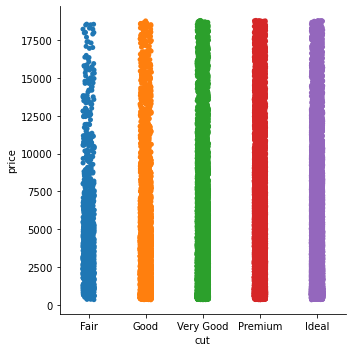

In [14]:
sns.catplot(x ="cut",y= "price", data=diamond)

<AxesSubplot:xlabel='cut', ylabel='price'>

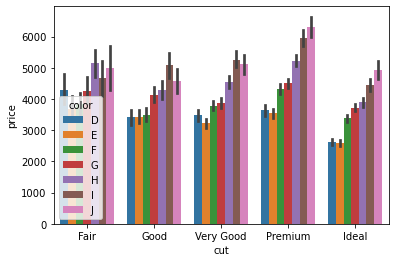

In [15]:
sns.barplot(x ="cut", y="price", hue="color", data=diamond)

In [16]:
diamond.groupby(["cut","color"])["price"].mean()

cut        color
Fair       D        4291.061350
           E        3682.312500
           F        3827.003205
           G        4239.254777
           H        5135.683168
           I        4685.445714
           J        4975.655462
Good       D        3405.382175
           E        3423.644159
           F        3495.750275
           G        4123.482204
           H        4276.254986
           I        5078.532567
           J        4574.172638
Very Good  D        3470.467284
           E        3214.652083
           F        3778.820240
           G        3872.753806
           H        4535.390351
           I        5255.879568
           J        5103.513274
Premium    D        3631.292576
           E        3538.914420
           F        4324.890176
           G        4500.742134
           H        5216.706780
           I        5946.180672
           J        6294.591584
Ideal      D        2629.094566
           E        2597.550090
           F        337

C:\Users\s7522\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

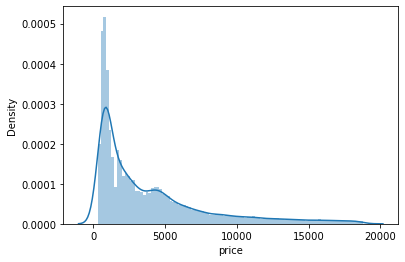

In [21]:
sns.distplot(diamond.price,bins=100, kde=True)

In [20]:
?sns.distplot

C:\Users\s7522\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

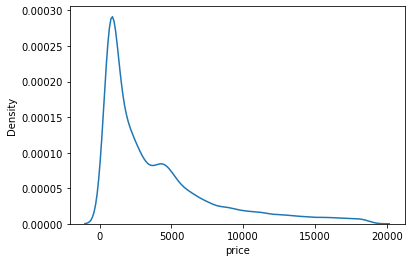

In [22]:
sns.distplot(diamond.price, hist=False)

<AxesSubplot:xlabel='price', ylabel='Density'>

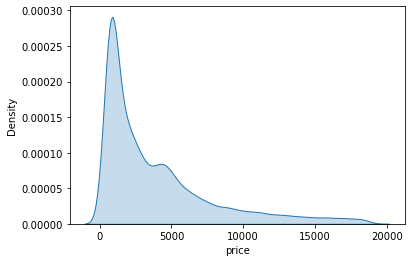

In [37]:
sns.kdeplot(diamond.price, shade=True) #yoğunluk grafiği

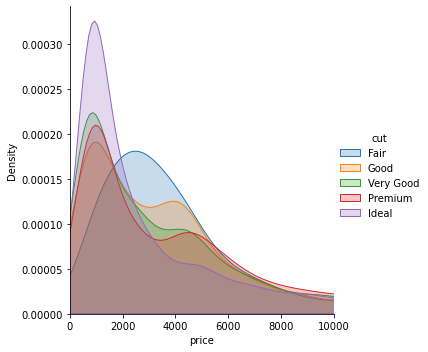

In [40]:
sns.FacetGrid(diamond, hue="cut", height = 5, xlim=(0,10000)).map(sns.kdeplot, "price" , shade=True).add_legend()

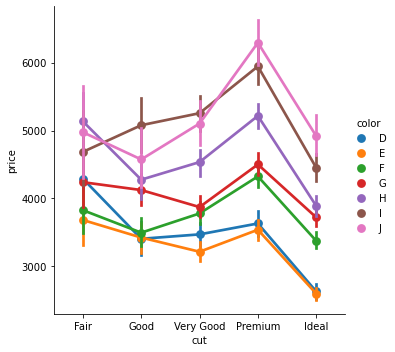

In [41]:
sns.catplot(x= "cut", y="price", hue="color", kind="point", data= diamond) #çizgi grafiği çarprazlama

In [42]:
diamond.groupby(["color","cut"])["price"].mean() 

color  cut      
D      Fair         4291.061350
       Good         3405.382175
       Very Good    3470.467284
       Premium      3631.292576
       Ideal        2629.094566
E      Fair         3682.312500
       Good         3423.644159
       Very Good    3214.652083
       Premium      3538.914420
       Ideal        2597.550090
F      Fair         3827.003205
       Good         3495.750275
       Very Good    3778.820240
       Premium      4324.890176
       Ideal        3374.939362
G      Fair         4239.254777
       Good         4123.482204
       Very Good    3872.753806
       Premium      4500.742134
       Ideal        3720.706388
H      Fair         5135.683168
       Good         4276.254986
       Very Good    4535.390351
       Premium      5216.706780
       Ideal        3889.334831
I      Fair         4685.445714
       Good         5078.532567
       Very Good    5255.879568
       Premium      5946.180672
       Ideal        4451.970377
J      Fair         497

In [43]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [44]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [47]:
df.select_dtypes(include = ["category"])

,sex,smoker,day,time
0,Female,No,Sun,Dinner
1,Male,No,Sun,Dinner
2,Male,No,Sun,Dinner
3,Male,No,Sun,Dinner
4,Female,No,Sun,Dinner
...,...,...,...,...
239,Male,No,Sat,Dinner
240,Female,Yes,Sat,Dinner
241,Male,Yes,Sat,Dinner
242,Male,No,Sat,Dinner


In [48]:
df["sex"].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

C:\Users\s7522\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


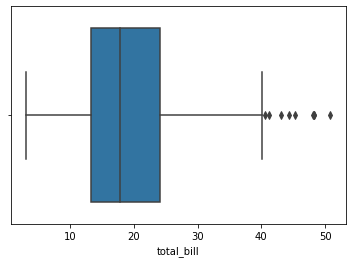

In [54]:
sns.boxplot(x = df["total_bill"], orient="v")

<AxesSubplot:xlabel='day', ylabel='total_bill'>

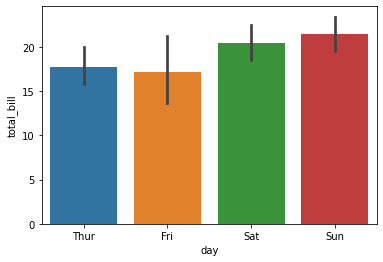

In [62]:
sns.barplot( x="day", y="total_bill", data=df)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

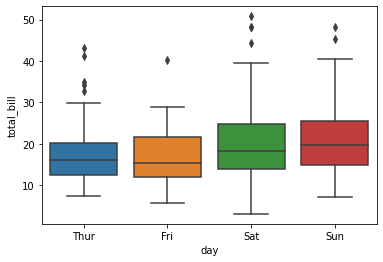

In [63]:
sns.boxplot(x= "day", y= "total_bill", data=df)

<AxesSubplot:xlabel='time', ylabel='total_bill'>

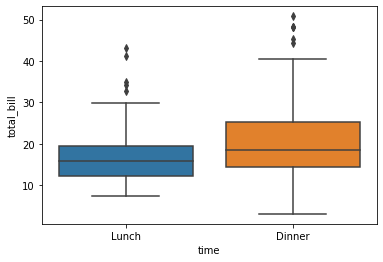

In [64]:
sns.boxplot(x = "time", y="total_bill", data=df) #kutu grafiği

<AxesSubplot:xlabel='size', ylabel='total_bill'>

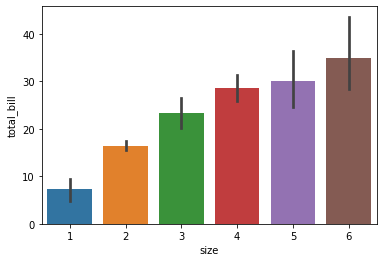

In [68]:
sns.barplot(x= "size", y="total_bill", data=df) #bar grafiği

<AxesSubplot:xlabel='day', ylabel='total_bill'>

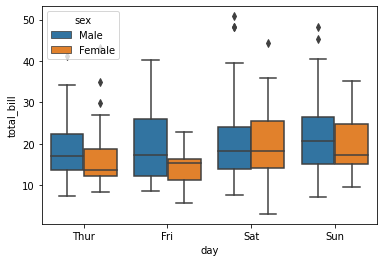

In [69]:
sns.boxplot(x ="day", y="total_bill", hue="sex", data=df) #kutu grafiği çarprazlama

In [70]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


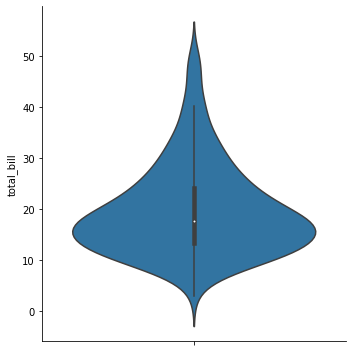

In [71]:
sns.catplot(y="total_bill", kind="violin", data=df) 

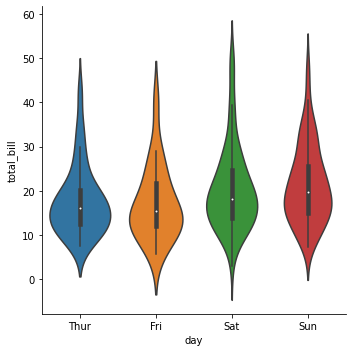

In [72]:
sns.catplot(y="total_bill" , x="day", kind="violin", data=df) #violin

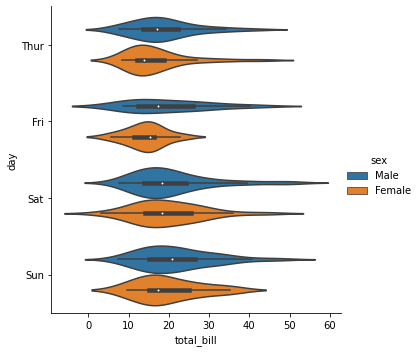

In [74]:
sns.catplot(x= "total_bill", y="day" , hue="sex",kind ="violin", data=df) #violin çarprazlama

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

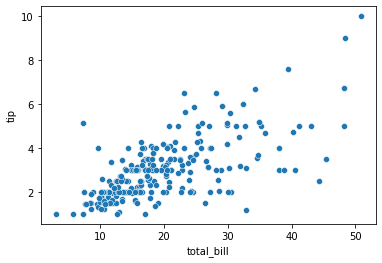

In [75]:
sns.scatterplot(x="total_bill", y="tip", data=df) #korelasyon grafiği

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

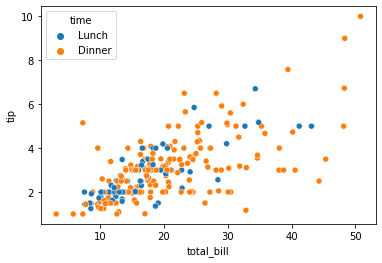

In [83]:
sns.scatterplot(x="total_bill", y="tip", hue="time", data=df) #korelasyon çarprazlama

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

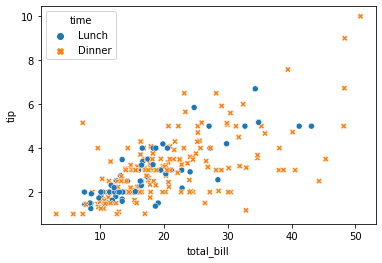

In [80]:
sns.scatterplot( x= "total_bill", y="tip", hue="time",style="time" ,data=df)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

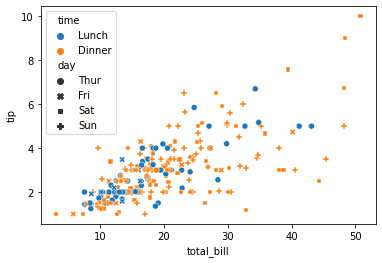

In [82]:
sns.scatterplot( x= "total_bill", y="tip", hue="time",style="day" ,data=df)

In [85]:
?sns.scatterplot

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

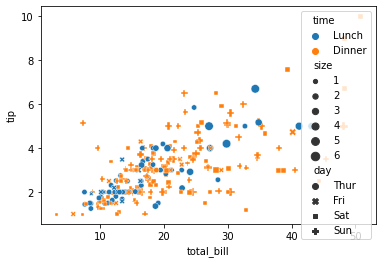

In [86]:
sns.scatterplot( x= "total_bill", y="tip", hue="time",style="day",size="size" ,data=df)

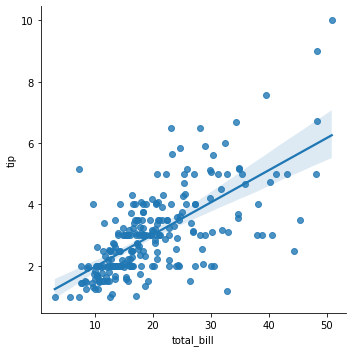

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lmplot(x= "total_bill", y="tip", data=df)

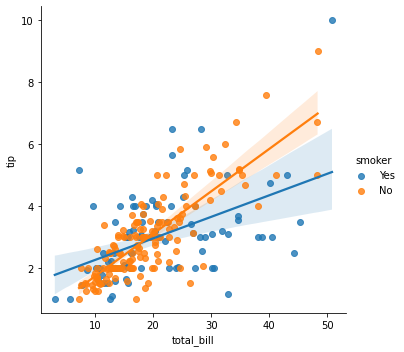

In [88]:
sns.lmplot(x= "total_bill", y="tip",hue="smoker", data=df)

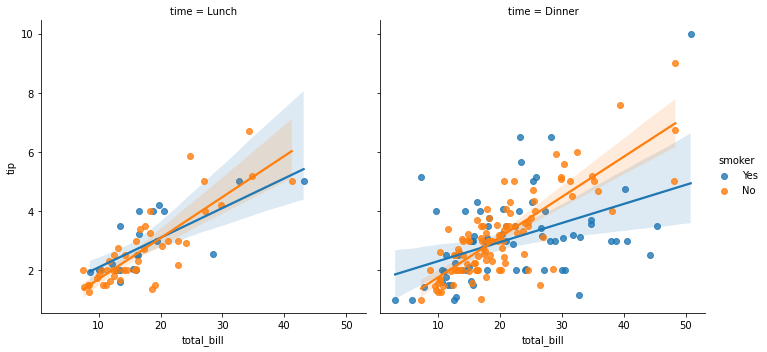

In [90]:
sns.lmplot(x= "total_bill", y="tip",hue="smoker",col="time" ,data=df)

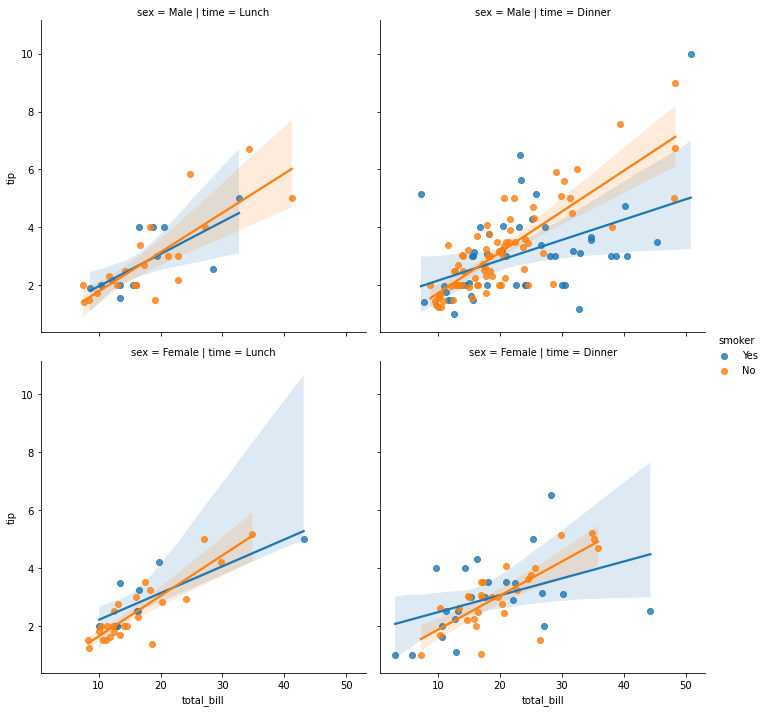

In [91]:
sns.lmplot(x= "total_bill", y="tip",hue="smoker",col="time",row="sex",data=df)

In [92]:
import seaborn as sns
iris = sns.load_dataset("iris")
df=iris.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


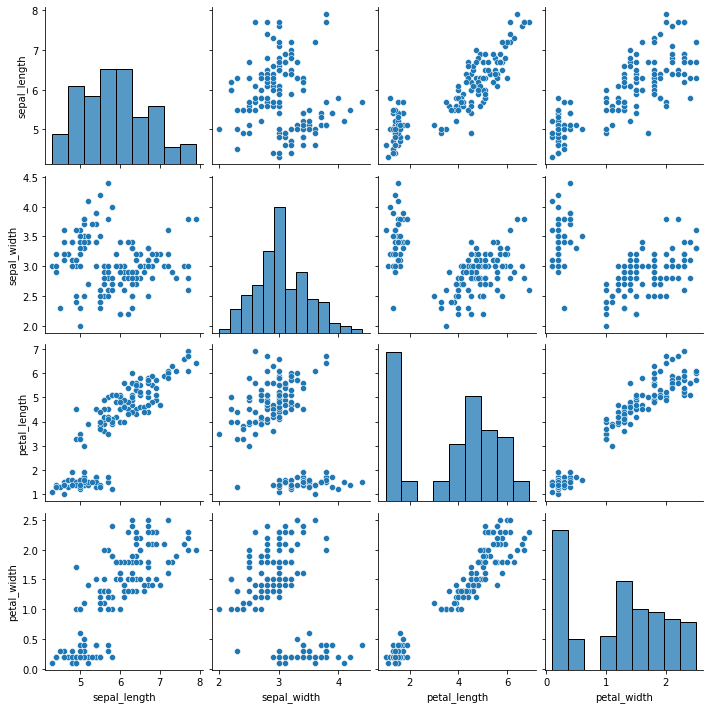

In [93]:
sns.pairplot(df)

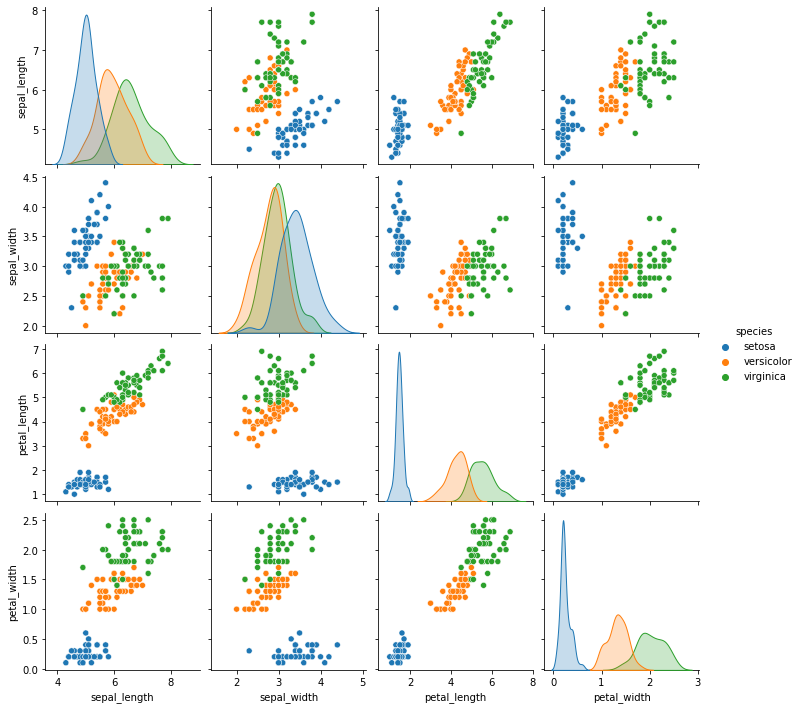

In [94]:
sns.pairplot(df, hue="species")

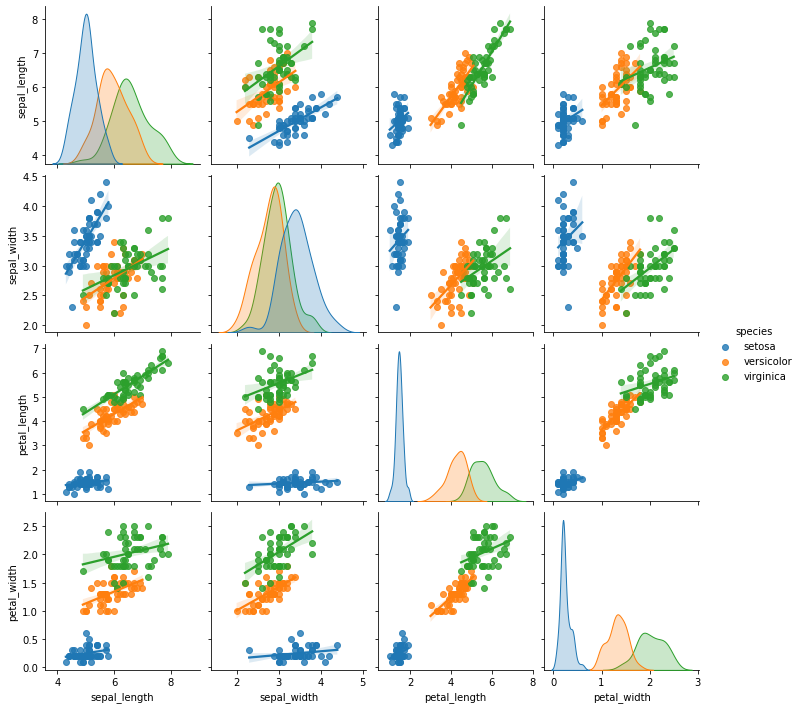

In [95]:
sns.pairplot(df, hue="species", kind="reg") #scatterplot matrisi

In [96]:
import seaborn as sns
flights = sns.load_dataset("flights")
df = flights.copy()
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [98]:
df["passengers"].describe().T

count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: passengers, dtype: float64

In [108]:
df=df.pivot("month","year","passengers")

<AxesSubplot:xlabel='year', ylabel='month'>

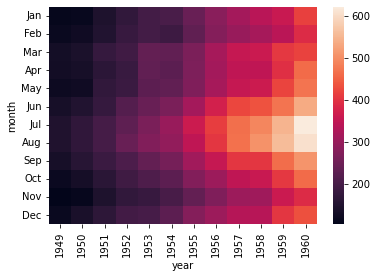

In [106]:
sns.heatmap(df.pivot("month","year","passengers"))

<AxesSubplot:xlabel='year', ylabel='month'>

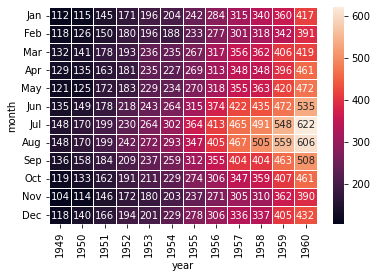

In [109]:
sns.heatmap(df, annot= True, fmt="d", linewidths=.5)

In [110]:
import seaborn as sns
fmri = sns.load_dataset("fmri")
df = fmri.copy()
df.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [113]:
df.shape

(1064, 5)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   subject    1064 non-null   object 
 1   timepoint  1064 non-null   int64  
 2   event      1064 non-null   object 
 3   region     1064 non-null   object 
 4   signal     1064 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 41.7+ KB


In [115]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
timepoint,1064.0,9.00000,5.479801,0.000000,4.00000,9.000000,14.000000,18.000000
signal,1064.0,0.00354,0.093930,-0.255486,-0.04607,-0.013653,0.024293,0.564985


In [117]:
df["timepoint"].describe()

count    1064.000000
mean        9.000000
std         5.479801
min         0.000000
25%         4.000000
50%         9.000000
75%        14.000000
max        18.000000
Name: timepoint, dtype: float64

In [118]:
df["signal"].describe()

count    1064.000000
mean        0.003540
std         0.093930
min        -0.255486
25%        -0.046070
50%        -0.013653
75%         0.024293
max         0.564985
Name: signal, dtype: float64

In [119]:
df.groupby("timepoint")["signal"].count()

timepoint
0     56
1     56
2     56
3     56
4     56
5     56
6     56
7     56
8     56
9     56
10    56
11    56
12    56
13    56
14    56
15    56
16    56
17    56
18    56
Name: signal, dtype: int64

In [120]:
df.groupby("signal").count()

,subject,timepoint,event,region
signal,,,,
-0.255486,1,1,1,1
-0.238474,1,1,1,1
-0.224351,1,1,1,1
-0.181241,1,1,1,1
-0.178510,1,1,1,1
...,...,...,...,...
0.455575,1,1,1,1
0.460896,1,1,1,1
0.476055,1,1,1,1


In [121]:
df.groupby("timepoint")["signal"].describe()

,count,mean,std,min,25%,50%,75%,max
timepoint,,,,,,,,
0,56.0,-0.016662,0.028326,-0.064454,-0.039169,-0.018382,0.003539,0.074399
1,56.0,-0.025002,0.030641,-0.082174,-0.046299,-0.024533,-0.005388,0.063558
2,56.0,-0.012873,0.035440,-0.110565,-0.034944,-0.013183,0.009318,0.077277
3,56.0,0.034446,0.058260,-0.089708,-0.001157,0.028430,0.061840,0.185581
4,56.0,0.098194,0.092838,-0.046347,0.030912,0.070166,0.144911,0.346775
5,56.0,0.137725,0.123353,-0.017946,0.042762,0.096535,0.211638,0.476055
6,56.0,0.127515,0.137332,-0.054405,0.022409,0.068850,0.218919,0.564985
7,56.0,0.075660,0.129704,-0.108222,-0.016252,0.032486,0.144781,0.494787
8,56.0,0.013420,0.104216,-0.181241,-0.049453,-0.012834,0.030396,0.337143


<AxesSubplot:xlabel='timepoint', ylabel='signal'>

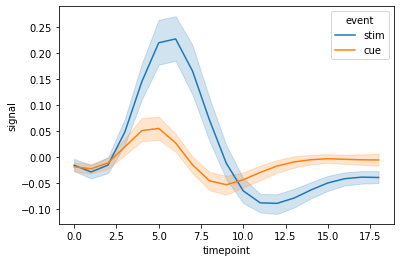

In [123]:
sns.lineplot(x= "timepoint" , y="signal", hue="event", data=df)

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

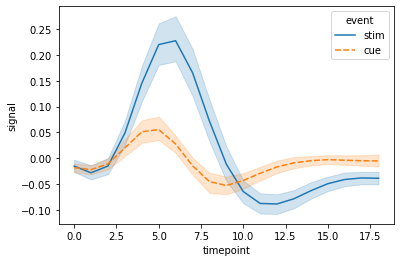

In [124]:
sns.lineplot(x= "timepoint" , y="signal", hue="event",style="event", data=df)

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

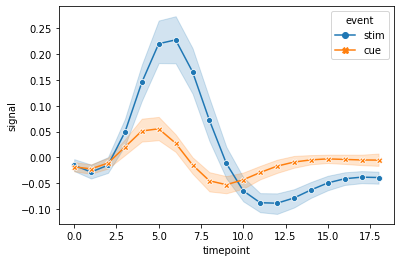

In [125]:
sns.lineplot(x= "timepoint" , y="signal", hue="event",style="event",markers=True ,dashes=False, data=df)

In [134]:
!pip install pandas_datareader
import pandas_datareader as pr
import pandas as pd

In [127]:
df = pr.get_data_yahoo("AAPL", start= "2016-01-01", end= "2019-08-25")

In [128]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,26.342501,25.500000,25.652500,26.337500,270597600.0,24.185043
2016-01-05,26.462500,25.602501,26.437500,25.677500,223164000.0,23.578983
2016-01-06,25.592501,24.967501,25.139999,25.174999,273829600.0,23.117548
2016-01-07,25.032499,24.107500,24.670000,24.112499,324377600.0,22.141886
2016-01-08,24.777500,24.190001,24.637501,24.240000,283192000.0,22.258961


In [129]:
df.shape


(917, 6)

In [130]:
kapanis = df["Close"]

<AxesSubplot:xlabel='Date'>

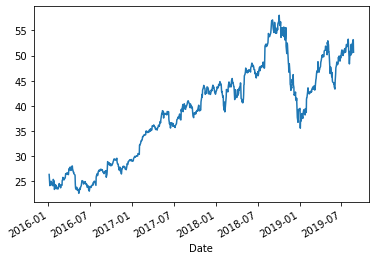

In [131]:
kapanis.plot()

In [132]:
kapanis.index

DatetimeIndex(['2016-01-04', '2016-01-05', '2016-01-06', '2016-01-07',
               '2016-01-08', '2016-01-11', '2016-01-12', '2016-01-13',
               '2016-01-14', '2016-01-15',
               ...
               '2019-08-12', '2019-08-13', '2019-08-14', '2019-08-15',
               '2019-08-16', '2019-08-19', '2019-08-20', '2019-08-21',
               '2019-08-22', '2019-08-23'],
              dtype='datetime64[ns]', name='Date', length=917, freq=None)

In [135]:
kapanis.index = pd.DatetimeIndex(kapanis.index)

In [137]:
kapanis.head()

Date
2016-01-04    26.337500
2016-01-05    25.677500
2016-01-06    25.174999
2016-01-07    24.112499
2016-01-08    24.240000
Name: Close, dtype: float64

In [ ]:
kapanis.plot()